In [11]:

from dpsgd_keras_slow import *
import numpy as np
import pickle 
from matplotlib import pyplot as plt
training_sample = 60000
batch_size = 500
steps_in_one_epoch = training_sample // batch_size
steps_in_one_epoch

120

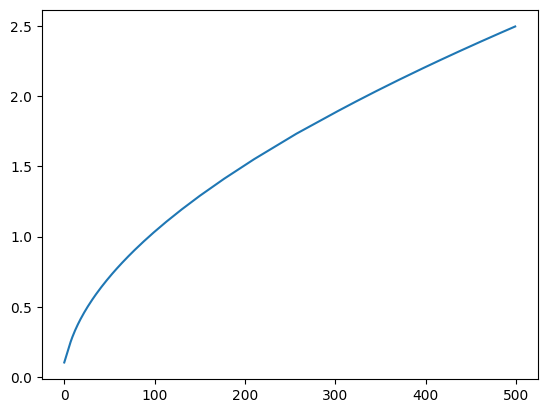

In [13]:
# get the noise:
# compare it with the original paper
epsilons = []
max_step = 50000
for step in range(1, max_step, 100):
    epsilons.append(compute_epsilon(step, 0.01, 4))
# plot the noise
plt.plot(epsilons)


有点像，但不完全是。

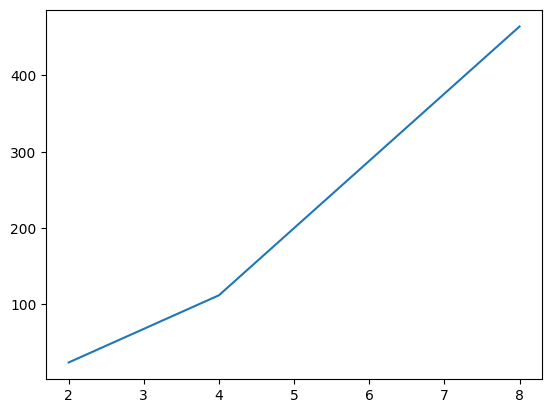

In [9]:
# extra work: calculate how much epochs are needed to achieve the same privacy level under different noise level
target_epsilon = 1.0
noise_level = [2,4,8]
epochs_needed = []
def compute_epsilon_inverse(target_epsilon, q, noise):
    target_epoch = 1
    while compute_epsilon(target_epoch * steps_in_one_epoch, q, noise) < target_epsilon:
        target_epoch += 1
    return target_epoch - 1

for noise in noise_level:
    epochs_needed.append(compute_epsilon_inverse(target_epsilon, 1/steps_in_one_epoch, noise))
plt.plot(noise_level, epochs_needed)


In [8]:
compute_epsilon(10000, 0.01, 2)

2.3529131287817933

In [10]:
epochs_needed

[24, 112, 464]